In [497]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [498]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
orig_train = train
orig_test = test

In [499]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [500]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [501]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [502]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Features:**
* Numerical: Age, SibSp, Parch, Fare
* Categorical: Pclass, Sex, Embarked (, survived)

**Null to consider:**
* Age
* Fare
* Embarked
* #Cabin has too many null values

In [503]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [504]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **1. Simple analysis**

# 1-a) Pclass
* Smaller number has higher survival rate = may mean that smaller number is higher class

In [505]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# 1-b) Sex
* Female has remarkably higher survival rate than male does

In [506]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [507]:
# replace the column with numerical values (female=1, male=2)
rep_sex = {'female' : 1, 'male' : 2}
train['Sex'] = train['Sex'].map(rep_sex)
test['Sex'] = test['Sex'].map(rep_sex)

In [508]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S


# 1-c) SibSp and Parch

In [509]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp')

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [510]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch')

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


* It is better to make a family size instead of dealing with the separated features because I cannot find any remarkable correlations
* The formula for a family size is 1+(value of SibSp)+(value of Parch) because SibSp is the number of siblings and Parch is the number of parents and children

In [511]:
train['Family_size'] = 1+train['SibSp']+train['Parch']
test['Family_size'] = 1+test['SibSp']+test['Parch']
train[['Family_size', 'Survived']].groupby(['Family_size'], as_index=False).mean().sort_values(by='Family_size')

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


* Increasing until family size reaches 4, and then decreasing drastically
* Can be used as a feature instead of SibSp and Parch

# 1-d) Embarked

In [512]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


* Embarked (distination) has the apparent highest survival rate in C.

In [513]:
# add Embarked column with numerical values (C=1, Q=2, S=3) to see whether it has correlation with other features
rep_embarked = {'C' : 1, 'Q' : 2, 'S' : 3}
train['Embarked'] = train['Embarked'].map(rep_embarked)
test['Embarked'] = test['Embarked'].map(rep_embarked)

In [514]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,3.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.0,2
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,3.0,1


# 1-e) Age

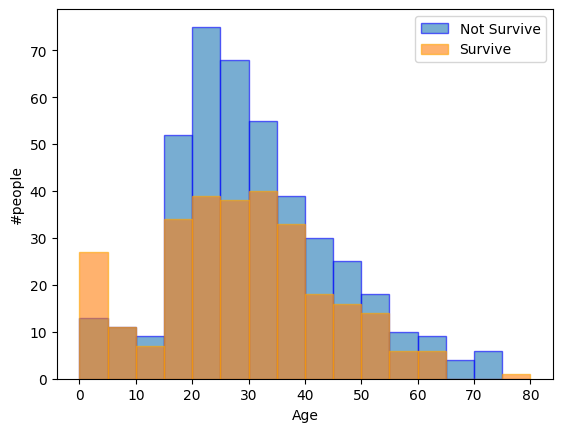

In [515]:
# not survive VS survive by age distribution
plt.hist(train[train['Survived']==0][['Age']], bins=np.arange(0, max(train['Age'])+1, 5), alpha=.6, edgecolor='blue', label='Not Survive')

plt.hist(train[train['Survived']==1][['Age']], bins=np.arange(0, max(train['Age'])+1, 5), alpha=.6, edgecolor='orange', label='Survive')

plt.xlabel('Age')
plt.ylabel('#people')
plt.legend()
plt.show()

**Comparison**
* Survival rate of infant (0-5) passengers is high
* Only about 1/3 of youth (15-35) passengers survived
* The oldest survived
* Except for the extreme population (infant and oldest), both distributions seem to have the common trend

# 1-f) Fare

In [516]:
train['ranged_Fare'] = pd.qcut(train['Fare'], 4)
train[['ranged_Fare', 'Survived']].groupby(['ranged_Fare'], as_index=False).mean().sort_values(by='ranged_Fare')

,ranged_Fare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


* The more fare a passenger paid, the more survival rate the person has

In [517]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,3.0,2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.0,2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,3.0,1,"(7.91, 14.454]"


# **2. Correlation in features**

# 2-a) Train set correlations

<Axes: >

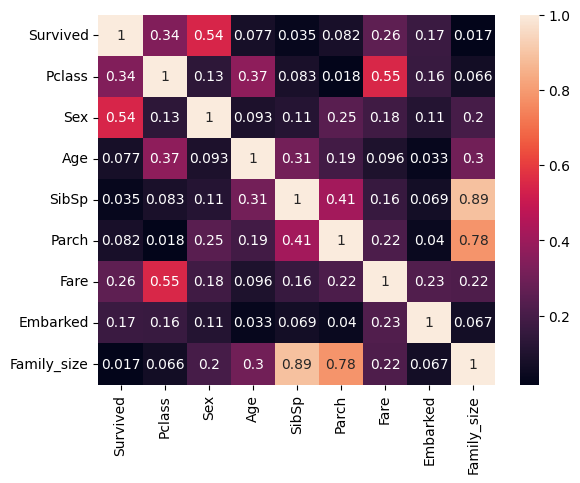

In [518]:
sns.heatmap(train.drop(['PassengerId', 'ranged_Fare', 'Name', 'Ticket'], axis=1).corr().abs(), annot=True)

* Strong (>0.5): (Survived, Sex), (Pclass, Fare)
* Middle (>0.4): (SibSp, Parch)
* Correlation exists (>0.3): (Survived, Pclass), (Age, Pclass), (Age, SibSp), (Age, Family_size)
* #SibSp, Parch must correlate with Family_size so should not be considered

# 2-b) Test set correlations

<Axes: >

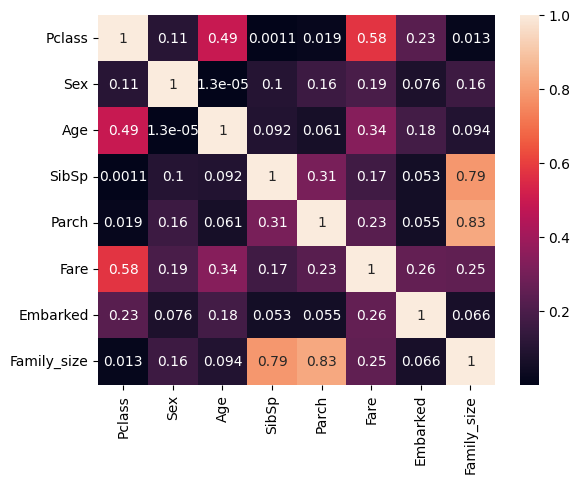

In [519]:
sns.heatmap(test.drop(['PassengerId', 'Name', 'Ticket'], axis=1).corr().abs(), annot=True)

* Strong (>0.5): (Pclass, Fare)
* Middle (>0.4): (Age, Pclass)
* Correlation exists (>0.3): (SibSp, Parch), (Age, Fare)
* #SibSp, Parch must correlate with Family_size so should not be considered

# **3. Null values**

In [520]:
# recalling null values in training set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Family_size      0
ranged_Fare      0
dtype: int64

In [521]:
# recalling null values in testing set
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Family_size     0
dtype: int64

# 3-a) Fare

* Testing set has one missing value in Fare column

In [522]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
152,1044,3,"Storey, Mr. Thomas",2,60.5,0,0,3701,NaN,3,1


In [523]:
# checking the medians with correlated features (Pclass, Age) with Pclass=1 and Age>40
fare_set = test[['Fare', 'Age', 'Pclass']].groupby(['Age', 'Pclass']).median().query("Pclass==3 & Age>40")
fare_set

,,Fare
Age,Pclass,
40.5,3,15.10000
41.0,3,7.85000
43.0,3,7.89580
45.0,3,10.66665
47.0,3,7.00000
50.0,3,14.50000
60.5,3,NaN


In [524]:
# filling the missing value with the mean of median of Fare in fare_set
test['Fare'] = test['Fare'].fillna(np.mean(fare_set['Fare']))
test.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                             2
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                    10.502075
Embarked                        3
Family_size                     1
Name: 152, dtype: object

# 3-b) Embarked

* Training set has two missing values in Embarked column

In [525]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,NaN,1,"(31.0, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,NaN,1,"(31.0, 512.329]"


* According to this website https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html, Martha Evelyn Stone was embarked to Southampton, which is S or 3, with her maid Amelie Icard.

In [526]:
train['Embarked'] = train['Embarked'].fillna(3)
train.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                                    1
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Embarked                                             3.0
Family_size                                            1
ranged_Fare                              (31.0, 512.329]
Name: 829, dtype: object

# 3-c) Age

* Training set has 177 missing values in Age column
* Testing set has 86 missing values in Age column

**3-c-1) train set**

In [527]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
5,6,0,3,"Moran, Mr. James",2,NaN,0,0,330877,8.4583,2.0,1,"(7.91, 14.454]"
17,18,1,2,"Williams, Mr. Charles Eugene",2,NaN,0,0,244373,13.0000,3.0,1,"(7.91, 14.454]"
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,1.0,1,"(-0.001, 7.91]"
26,27,0,3,"Emir, Mr. Farred Chehab",2,NaN,0,0,2631,7.2250,1.0,1,"(-0.001, 7.91]"
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,2.0,1,"(-0.001, 7.91]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",2,NaN,0,0,2629,7.2292,1.0,1,"(-0.001, 7.91]"
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,3.0,11,"(31.0, 512.329]"
868,869,0,3,"van Melkebeke, Mr. Philemon",2,NaN,0,0,345777,9.5000,3.0,1,"(7.91, 14.454]"
878,879,0,3,"Laleff, Mr. Kristo",2,NaN,0,0,349217,7.8958,3.0,1,"(-0.001, 7.91]"


In [528]:
# for training set, consider (Age, Pclass) (Age, SibSp) correlation to decide the missing values in Age
train[['Age', 'Pclass', 'SibSp']].corr()

,Age,Pclass,SibSp
Age,1.000000,-0.369226,-0.308247
Pclass,-0.369226,1.000000,0.083081
SibSp,-0.308247,0.083081,1.000000


In [529]:
train_ages = train[['Pclass', 'SibSp', 'Age']].groupby(['Pclass', 'SibSp'], as_index=False).median()
train_ages

,Pclass,SibSp,Age
0,1,0,37.0
1,1,1,38.0
2,1,2,44.0
3,1,3,23.0
4,2,0,30.0
5,2,1,29.0
6,2,2,23.5
7,2,3,30.0
8,3,0,26.0
9,3,1,25.0


In [530]:
for p in range(1, 4):
    for s in range(0, 4):
        train.loc[(train['Age'].isnull()==True) & (train['Pclass']==p) & (train['SibSp']==s), 'Age'] = train_ages.loc[(p-1)*4+s].Age
train.loc[(train['Age'].isnull()) & (train['Pclass']==3) & (train['SibSp']==4), 'Age'] = train_ages.loc[12].Age
train.loc[(train['Age'].isnull()) & (train['Pclass']==3) & (train['SibSp']==5), 'Age'] = train_ages.loc[13].Age
# for the outlier (p=3, s=8), since the median is also nan, use the mean of medians belonged to (p=3, s=3,4,5)
train.loc[(train['Age'].isnull()) & (train['Pclass']==3) & (train['SibSp']==8), 'Age'] = np.mean([train_ages.loc[11].Age, train_ages.loc[12].Age, train_ages.loc[13].Age])

In [531]:
train.loc[17] # check the inputation was correctly done (expected: Age=30.0)

PassengerId                              18
Survived                                  1
Pclass                                    2
Name           Williams, Mr. Charles Eugene
Sex                                       2
Age                                    30.0
SibSp                                     0
Parch                                     0
Ticket                               244373
Fare                                   13.0
Embarked                                3.0
Family_size                               1
ranged_Fare                  (7.91, 14.454]
Name: 17, dtype: object

**3-c-2) test set**

In [532]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
10,902,3,"Ilieff, Mr. Ylio",2,NaN,0,0,349220,7.8958,3,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,PC 17598,31.6833,3,1
29,921,3,"Samaan, Mr. Elias",2,NaN,2,0,2662,21.6792,1,3
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,1,2,W./C. 6607,23.4500,3,4
36,928,3,"Roth, Miss. Sarah A",1,NaN,0,0,342712,8.0500,3,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,2,1
410,1302,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,2,1
413,1305,3,"Spector, Mr. Woolf",2,NaN,0,0,A.5. 3236,8.0500,3,1
416,1308,3,"Ware, Mr. Frederick",2,NaN,0,0,359309,8.0500,3,1


In [533]:
# for testing set, consider (Age, Pclass) (Age, Fare) correlation to decide the missing values in Age
test[['Age', 'Pclass', 'Fare']].corr()

,Age,Pclass,Fare
Age,1.000000,-0.492143,0.332262
Pclass,-0.492143,1.000000,-0.577421
Fare,0.332262,-0.577421,1.000000


In [534]:
# first, make the ranged_Fare for this dataset (this column is not for replacement in next section)
test['ranged_Fare'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])
test_ages = test[['Pclass', 'ranged_Fare', 'Age']].groupby(['Pclass', 'ranged_Fare'], as_index=False).median()
test_ages

,Pclass,ranged_Fare,Age
0,1,1,49.0
1,1,2,NaN
2,1,3,42.0
3,1,4,41.5
4,2,1,NaN
5,2,2,26.0
6,2,3,29.0
7,2,4,22.0
8,3,1,24.5
9,3,2,23.0


In [535]:
# filling the missing values in test_ages using linear regression
x1 = [1, 3, 4]
y1 = [49.0, 42.0, 41.5]
x2 = [2, 3, 4]
y2 = [26.0, 29.0, 22.0]

r1 = np.mean(((x1-np.mean(x1))/np.std(x1))*((y1-np.mean(y1))/np.std(y1)))
r2 = np.mean(((x2-np.mean(x2))/np.std(x2))*((y2-np.mean(y2))/np.std(y2)))

test_ages.loc[1, 'Age'] = (r1*(np.std(y1)/np.std(x1)))*2 + (np.mean(y1)-(r1*(np.std(y1)/np.std(x1)))*np.mean(x1))
test_ages.loc[4, 'Age'] = (r2*(np.std(y2)/np.std(x2)))*1 + (np.mean(y2)-(r2*(np.std(y2)/np.std(x2)))*np.mean(x2))
test_ages

,Pclass,ranged_Fare,Age
0,1,1,49.000000
1,1,2,45.928571
2,1,3,42.000000
3,1,4,41.500000
4,2,1,29.666667
5,2,2,26.000000
6,2,3,29.000000
7,2,4,22.000000
8,3,1,24.500000
9,3,2,23.000000


In [536]:
for p in range(1, 4):
    for f in range(1, 5):
        test.loc[(test['Age'].isnull()==True) & (test['Pclass']==p) & (test['ranged_Fare']==f), 'Age'] = test_ages.loc[(p-1)*4+f-1].Age

In [537]:
# checking the inputation was correctly done (expected: Age=19.0)
test.loc[33]

PassengerId                                                  925
Pclass                                                         3
Name           Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"
Sex                                                            1
Age                                                         19.0
SibSp                                                          1
Parch                                                          2
Ticket                                                W./C. 6607
Fare                                                       23.45
Embarked                                                       3
Family_size                                                    4
ranged_Fare                                                    3
Name: 33, dtype: object

In [538]:
train.isnull().sum().sum()

0

In [539]:
test.isnull().sum().sum()

0

# **4. Replacement**

In [540]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,3.0,2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.0,2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,3.0,1,"(7.91, 14.454]"


In [541]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,892,3,"Kelly, Mr. James",2,34.5,0,0,330911,7.8292,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,3,2,1
2,894,2,"Myles, Mr. Thomas Francis",2,62.0,0,0,240276,9.6875,2,1,2
3,895,3,"Wirz, Mr. Albert",2,27.0,0,0,315154,8.6625,3,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,3,3,2


* Both datasets should be modified their age and fare into numerical classification

# 4-a) Age replacement

In [542]:
[max(train['Age']), max(test['Age'])]

[80.0, 76.0]

In [543]:
# distribute the age into 16 bins (or each bin has width of 5)
for ds in [train, test]:
    ds.loc[ds['Age']<=5, 'Age'] = 0
    ds.loc[(ds['Age']>5) & (ds['Age']<=10), 'Age'] = 1
    ds.loc[(ds['Age']>10) & (ds['Age']<=15), 'Age'] = 2
    ds.loc[(ds['Age']>15) & (ds['Age']<=20), 'Age'] = 3
    ds.loc[(ds['Age']>20) & (ds['Age']<=25), 'Age'] = 4
    ds.loc[(ds['Age']>25) & (ds['Age']<=30), 'Age'] = 5
    ds.loc[(ds['Age']>30) & (ds['Age']<=35), 'Age'] = 6
    ds.loc[(ds['Age']>35) & (ds['Age']<=40), 'Age'] = 7
    ds.loc[(ds['Age']>40) & (ds['Age']<=45), 'Age'] = 8
    ds.loc[(ds['Age']>45) & (ds['Age']<=50), 'Age'] = 9
    ds.loc[(ds['Age']>50) & (ds['Age']<=55), 'Age'] = 10
    ds.loc[(ds['Age']>55) & (ds['Age']<=60), 'Age'] = 11
    ds.loc[(ds['Age']>60) & (ds['Age']<=65), 'Age'] = 12
    ds.loc[(ds['Age']>65) & (ds['Age']<=70), 'Age'] = 13
    ds.loc[(ds['Age']>70) & (ds['Age']<=75), 'Age'] = 14
    ds.loc[ds['Age']>75, 'Age'] = 15

In [544]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,1,0,3,"Braund, Mr. Owen Harris",2,4.0,1,0,A/5 21171,7.2500,3.0,2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7.0,1,0,PC 17599,71.2833,1.0,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,5.0,0,0,STON/O2. 3101282,7.9250,3.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6.0,1,0,113803,53.1000,3.0,2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",2,6.0,0,0,373450,8.0500,3.0,1,"(7.91, 14.454]"


In [545]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,892,3,"Kelly, Mr. James",2,6.0,0,0,330911,7.8292,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,9.0,1,0,363272,7.0000,3,2,1
2,894,2,"Myles, Mr. Thomas Francis",2,12.0,0,0,240276,9.6875,2,1,2
3,895,3,"Wirz, Mr. Albert",2,5.0,0,0,315154,8.6625,3,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,4.0,1,1,3101298,12.2875,3,3,2


# 4-b) Fare replacement

In [546]:
train[['ranged_Fare', 'Survived']].groupby(['ranged_Fare'], as_index=False).mean().sort_values(by='ranged_Fare')

,ranged_Fare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


* Apply these ranges to both datasets to obtain the classes

In [547]:
for ds in [train, test]:
    ds.loc[ds['Fare']<=7.91, 'Fare'] = 0
    ds.loc[(ds['Fare']>7.91) & (ds['Fare']<=14.454), 'Fare'] = 1
    ds.loc[(ds['Fare']>14.454) & (ds['Fare']<=31.0), 'Fare'] = 2
    ds.loc[ds['Fare']>31.0, 'Fare'] = 3

In [548]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,1,0,3,"Braund, Mr. Owen Harris",2,4.0,1,0,A/5 21171,0.0,3.0,2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7.0,1,0,PC 17599,3.0,1.0,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,5.0,0,0,STON/O2. 3101282,1.0,3.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6.0,1,0,113803,3.0,3.0,2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",2,6.0,0,0,373450,1.0,3.0,1,"(7.91, 14.454]"


In [549]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,ranged_Fare
0,892,3,"Kelly, Mr. James",2,6.0,0,0,330911,0.0,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,9.0,1,0,363272,0.0,3,2,1
2,894,2,"Myles, Mr. Thomas Francis",2,12.0,0,0,240276,1.0,2,1,2
3,895,3,"Wirz, Mr. Albert",2,5.0,0,0,315154,1.0,3,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,4.0,1,1,3101298,1.0,3,3,2


# **5. Select features**

* Features that are going to be used to create models are Pclass, Sex, Age, Fare, Embarked, Family_size

In [550]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_size']

# **6. Models**

In [551]:
X_train = pd.get_dummies(train[features])
y_train = train['Survived']
X_test = pd.get_dummies(test[features])

# 6-1) KNN classifier

In [552]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

knn_prediction = knn.predict(X_test)
knn_acc = round(knn.score(X_train, y_train), 3)
print('Accuracy: ', knn_acc)

Accuracy:  0.874


* Actual score: 72.97

# 6-2) Logistic Regression

In [553]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

lreg_prediction = lreg.predict(X_test)
lreg_acc = round(lreg.score(X_train, y_train), 3)
print('Accuracy: ', lreg_acc)

Accuracy:  0.802


* Actual score: 75.60

# 6-3) Linear SVC

In [554]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

lsvc_prediction = lsvc.predict(X_test)
lsvc_acc = round(lsvc.score(X_train, y_train), 3)
print('Accuracy: ', lsvc_acc)

Accuracy:  0.8


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


* Actual score: 75.84

# 6-4) Random forest cassifier

In [555]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

rf_prediction = rf.predict(X_test)
rf_acc = round(rf.score(X_train, y_train), 3)
print('Accuracy: ', rf_acc)

Accuracy:  0.909


* Actual score: 75.84

# 6-5) Gaussian NB

In [556]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_prediction = gnb.predict(X_test)
gnb_acc = round(gnb.score(X_train, y_train), 3)
print('Accuracy: ', gnb_acc)

Accuracy:  0.771


* Actual score: 73.21

# 6-6) Perceptron

In [557]:
pcp = Perceptron(max_iter=5)
pcp.fit(X_train, y_train)

pcp_prediction = pcp.predict(X_test)
pcp_acc = round(pcp.score(X_train, y_train), 3)
print('Accuracy: ', pcp_acc)

Accuracy:  0.756


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


* Actual score: 67.94

# 6-7) SGD classifier

In [558]:
sgd = SGDClassifier(max_iter=5)
sgd.fit(X_train, y_train)

sgd_prediction = sgd.predict(X_test)
sgd_acc = round(sgd.score(X_train, y_train), 3)
print('Accuracy: ', sgd_acc)

Accuracy:  0.769


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


* Actual_score: 68.42

# 6-8) Decision tree classifier

In [559]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_prediction = dt.predict(X_test)
dt_acc = round(dt.score(X_train, y_train), 3)
print('Accuracy: ', dt_acc)

Accuracy:  0.909


* Actual score: 75.36

# **7. Hyperparameter tuning for random forest**

In [560]:
from sklearn.model_selection import GridSearchCV

n_estimators_range = np.arange(50, 150, 5)
max_depth_range = np.arange(4, 7)

par = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)
grid = GridSearchCV(estimator=rf, param_grid=par, cv=3)
grid.fit(X_train, y_train)
print('Best parameters: ', grid.best_params_)
print('Score: ', grid.best_score_)

Best parameters:  {'max_depth': 4, 'n_estimators': 90}
Score:  0.8237934904601572


In [561]:
rf2 = RandomForestClassifier(n_estimators=90, max_depth=4, random_state=1)
rf2.fit(X_train, y_train)

rf_prediction2 = rf2.predict(X_test)
rf2_acc = round(rf2.score(X_train, y_train), 3)
print('Accuracy: ', rf2_acc)

Accuracy:  0.838


* Actual score: 78.00

# **8. Conclusion**

In [562]:
models = ['KNN', 'Logistic Regression', 'Linear SVC', 'Random Forest', 'Gaussian NB', 'Perceptron', 'SGD', 'Decision Tree', 'Random Forest with Hyperparameter']
accs = [knn_acc, lreg_acc, lsvc_acc, rf_acc, gnb_acc, pcp_acc, sgd_acc, dt_acc, rf2_acc]
scores = [72.97, 75.60, 75.84, 75.84, 73.21, 67.94, 68.42, 75.36, 78.00]

pd.DataFrame({'Model' : models, 'Accuracy' : accs, 'Actual Score' : scores}).sort_values('Actual Score', ascending=False).reset_index(drop=True).style.highlight_max(subset=['Accuracy', 'Actual Score'])

,Model,Accuracy,Actual Score
0,Random Forest with Hyperparameter,0.838000,78.000000
1,Linear SVC,0.800000,75.840000
2,Random Forest,0.909000,75.840000
3,Logistic Regression,0.802000,75.600000
4,Decision Tree,0.909000,75.360000
5,Gaussian NB,0.771000,73.210000
6,KNN,0.874000,72.970000
7,SGD,0.769000,68.420000
8,Perceptron,0.756000,67.940000


* Models with highest accuracy: Random Forest, Decision Tree with 0.909
* Model with highest actual score: Random Forest with Hyperparameter with 78.00
* Having a higher accuracy is NOT equivalent to having a higher actual score since the data in the testing set is not balanced same as the data in the training set.
* Hyperparameter tuning is very meaningful to raise the actual score by preventing overfitting.

# **9. Submission**

In [563]:
output = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived' : rf_prediction2})
output.to_csv('submission.csv', index=False)